In [58]:
#task1 satndard imports
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [59]:
#task2 import dataset
class Model(nn.Module):
  
    #constructor will define no of layers,
    # input layer(4 feature)-->h1(some n)-->h2-->outputlayer(3)
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        print(f'NN layers \ninput features, hiddern layer 1, hidden layer2 and output payer as :{in_features,h1,h2,out_features}')
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)
        
    def forward(self,x):
        #here activation function for each layer aredefined
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x
        



In [60]:
#task3 set seed and make object of class Model
torch.manual_seed(37)
model = Model()

NN layers 
input features, hiddern layer 1, hidden layer2 and output payer as :(4, 8, 9, 3)


In [61]:
#import data
data=pd.read_csv('iris.csv')
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [62]:

#Data cleaning/EDA
data.drop('Id',axis=1, inplace=True)

In [63]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
#i need to convert categorical aspecies into numerical column by mapin it
Species=pd.Categorical(data['Species']).codes
data['Species']=Species

In [65]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
#task 4 split data
#a.make x and y
#b. convert to tensors


features = data.drop('Species',axis=1)
label =data['Species']


In [67]:
#b. convert to tensors, to do this first convert to numpy then split then conert to tesors
x= features.values
y = label.values

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [69]:
#task 5 split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=True)

In [70]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)


In [81]:
y_train = y_train.type(torch.LongTensor)
y_test = y_test.type(torch.LongTensor)

In [72]:
#task 6 to calculate error
criterion= nn.CrossEntropyLoss()
#OPTIMIZER( METHOD TO MINIMIZE ERROR USING STOCHASTIC GRADIENT DESCENT)
optimizer =torch.optim.Adam(model.parameters(),lr=0.01)

In [98]:
#task 7 setting for running NN
#a. set variables
#b.run NN
epochs = 100 #epoch is 1 run through all training data
losses=[] # to track loss/ error in each epocs

In [99]:
for i in range(epochs):
    y_pred = model.forward(x_train)    #one run over trianing data and getting y
    loss = criterion(y_pred,y_train)  #calcuation of loss
    losses.append(loss)                 #adding calcualted loss to our defined list
    optimizer.zero_grad()             # optimizer is applied that will calculate weight that will minimize loss
    loss.backward()                  #backward propagation
    optimizer.step()
    if i%10==0:
     print(f"Epoch: {i}  loss: {loss}") 


Epoch: 0  loss: 0.0486266165971756
Epoch: 10  loss: 0.048435650765895844
Epoch: 20  loss: 0.04825317859649658
Epoch: 30  loss: 0.04808459058403969
Epoch: 40  loss: 0.05050044134259224
Epoch: 50  loss: 0.048082541674375534
Epoch: 60  loss: 0.047965098172426224
Epoch: 70  loss: 0.047667451202869415
Epoch: 80  loss: 0.04746584966778755
Epoch: 90  loss: 0.04731830582022667


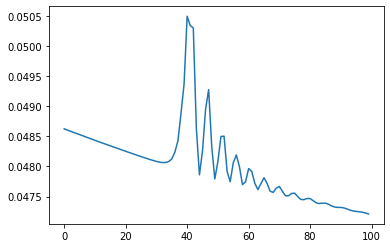

In [100]:
#task 8 plot epochs vs loss
plt.plot(range(epochs),losses)